In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20201118_generator,
    explored_models_20201114_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_source_analysis

In [2]:
import pandas as pd

In [3]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201114+20201118_separatebn', 'source_analysis.pkl')
if not exists(f_main_result):
    makedirs(dirname(f_main_result), exist_ok=True)
    df_main_result = collect_rcnn_k_bl_source_analysis(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
                        'multi_path': True,
            'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201114_generator(with_source=True, separate_bn_list=[True]),
            explored_models_20201118_generator(with_source=True, separate_bn_list=[True]),
        ),
        total_num_param=28,
        train_size_mapping={
            None: 5120,
        },
        no_missing_data=False,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

In [4]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           2           cm-avg       1280            18085   
                                                                                                  2560            18085   
                                                                                                  5120            18085   
                                                                                     cm-last      1280            18085   
                                                                                                  2560            18085   
...                                                                                                                 ...   
softplus True                 poisson   1          3         32          9           cm-avg       2560               -1   
                                                                                                  5120               -1   
                                                                         10          cm-avg       1280               -1   
                                                                                                  2560               -1   
                                                                                                  5120               -1   

                                                                                                                                                source_analysis  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu     False                mse       0          2         8           2           cm-avg       1280        {('I', 'B1'): 0.9640466402476751, ('I', 'B1', ...  
                                                                                                  2560        {('I', 'B1'): 1.6742002103456457, ('I', 'B1', ...  
                                                                                                  5120        {('I', 'B1'): 1.9757019198774763, ('I', 'B1', ...  
                                                                                     cm-last      1280        {('I', 'B1'): 0.6792646836651883, ('I', 'B1', ...  
                                                                                                  2560        {('I', 'B1'): 1.014677905380097, ('I', 'B1', '...  
...                                                                                                                                                         ...  
softplus True                 poisson   1          3         32          9           cm-avg       2560                                                     None  
                                                                                                  5120                                                     None  
                                                                         10          cm-avg       1280                                                     None  
                                                                                                  2560                                                     None  
                                                                                                  5120                                                     None  

[7776 rows x 2 columns]

In [5]:
df_main_result = df_main_result.dropna()

In [6]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           2           cm-avg       1280            18085   
                                                                                                  2560            18085   
                                                                                                  5120            18085   
                                                                                     cm-last      1280            18085   
                                                                                                  2560            18085   
...                                                                                                                 ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560            59533   
                                                                                                  5120            59533   
                                                                                     inst-last    1280            59533   
                                                                                                  2560            59533   
                                                                                                  5120            59533   

                                                                                                                                                source_analysis  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu     False                mse       0          2         8           2           cm-avg       1280        {('I', 'B1'): 0.9640466402476751, ('I', 'B1', ...  
                                                                                                  2560        {('I', 'B1'): 1.6742002103456457, ('I', 'B1', ...  
                                                                                                  5120        {('I', 'B1'): 1.9757019198774763, ('I', 'B1', ...  
                                                                                     cm-last      1280        {('I', 'B1'): 0.6792646836651883, ('I', 'B1', ...  
                                                                                                  2560        {('I', 'B1'): 1.014677905380097, ('I', 'B1', '...  
...                                                                                                                                                         ...  
softplus True                 poisson   1          3         32          3           inst-avg     2560        {('I', 'B1', 'B2'): 0.9500069538871887, ('I', ...  
                                                                                                  5120        {('I', 'B1', 'B2'): 2.375273891929007, ('I', '...  
                                                                                     inst-last    1280        {('I', 'B1', 'B2'): 0.1956196790461019, ('I', ...  
                                                                                                  2560        {('I', 'B1', 'B2'): 0.3202901846065905, ('I', ...  
                                                                                                  5120        {('I', 'B1', 'B2'): 0.6590144733504932, ('I', ...  

[5519 rows x 2 columns]

In [7]:
# compare with previous result.
f_main_result_prev = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'source_analysis.pkl')
df_main_result_prev = pd.read_pickle(f_main_result_prev)

In [8]:
def remove_high_cls(df_this):
    df_this = df_this[df_this.index.get_level_values('rcnn_bl_cls') <= 7]
    return df_this.sort_index()

df_main_result = remove_high_cls(df_main_result)
df_main_result_prev = remove_high_cls(df_main_result_prev)

In [9]:
# check their corrsponding ones, and compute vector similarity

In [10]:
import numpy as np

In [11]:
def get_normalized_vec(x):
#     keys = [('I',) + ('B1',) + ('R1',)*i for i in range(7)]
#     assert x.keys() <= set(keys)
    ret = np.zeros((8,))
    for key, v in x.items():
        assert len(key) >= 2 and len(key) <= 9
        ret[len(key)-2] += v  # -2 because minimal length of key is 2 (I + one Conv)
    ret = ret/ret.sum()
    return ret

df_main_result['source_analysis_vec'] = df_main_result['source_analysis'].map(lambda x: get_normalized_vec(x))
# del df_main_result['source_analysis']

In [12]:
df_main_result

num_param  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep              
relu     False                mse       0          2         8           2           cm-avg       1280            18085   
                                                                                                  2560            18085   
                                                                                                  5120            18085   
                                                                                     cm-last      1280            18085   
                                                                                                  2560            18085   
...                                                                                                                 ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560            59533   
                                                                                                  5120            59533   
                                                                                     inst-last    1280            59533   
                                                                                                  2560            59533   
                                                                                                  5120            59533   

                                                                                                                                                source_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu     False                mse       0          2         8           2           cm-avg       1280        {('I', 'B1'): 0.9640466402476751, ('I', 'B1', ...   
                                                                                                  2560        {('I', 'B1'): 1.6742002103456457, ('I', 'B1', ...   
                                                                                                  5120        {('I', 'B1'): 1.9757019198774763, ('I', 'B1', ...   
                                                                                     cm-last      1280        {('I', 'B1'): 0.6792646836651883, ('I', 'B1', ...   
                                                                                                  2560        {('I', 'B1'): 1.014677905380097, ('I', 'B1', '...   
...                                                                                                                                                         ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560        {('I', 'B1', 'B2'): 0.9500069538871887, ('I', ...   
                                                                                                  5120        {('I', 'B1', 'B2'): 2.375273891929007, ('I', '...   
                                                                                     inst-last    1280        {('I', 'B1', 'B2'): 0.1956196790461019, ('I', ...   
                                                                                                  2560        {('I', 'B1', 'B2'): 0.3202901846065905, ('I', ...   
                                                                                                  5120        {('I', 'B1', 'B2'): 0.6590144733504932, ('I', ...   

                                                                                                                                            source_analysis_vec  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                     
relu     False                mse       0          2         8    

In [13]:
df_main_result_prev['source_analysis_vec'] = df_main_result_prev['source_analysis'].map(lambda x: get_normalized_vec(x))
# del df_main_result_prev['source_analysis']

In [14]:
df_main_result_merged = df_main_result.join(df_main_result_prev,how='inner',lsuffix='new',rsuffix='old')

In [15]:
# ok. time to compute 

from scipy.spatial import distance

In [16]:
df_main_result_merged

num_paramnew  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                 
relu     False                mse       0          2         8           2           cm-avg       1280               18085   
                                                                                                  2560               18085   
                                                                                                  5120               18085   
                                                                                     cm-last      1280               18085   
                                                                                                  2560               18085   
...                                                                                                                    ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560               59533   
                                                                                                  5120               59533   
                                                                                     inst-last    1280               59533   
                                                                                                  2560               59533   
                                                                                                  5120               59533   

                                                                                                                                             source_analysisnew  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu     False                mse       0          2         8           2           cm-avg       1280        {('I', 'B1'): 0.9640466402476751, ('I', 'B1', ...   
                                                                                                  2560        {('I', 'B1'): 1.6742002103456457, ('I', 'B1', ...   
                                                                                                  5120        {('I', 'B1'): 1.9757019198774763, ('I', 'B1', ...   
                                                                                     cm-last      1280        {('I', 'B1'): 0.6792646836651883, ('I', 'B1', ...   
                                                                                                  2560        {('I', 'B1'): 1.014677905380097, ('I', 'B1', '...   
...                                                                                                                                                         ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560        {('I', 'B1', 'B2'): 0.9500069538871887, ('I', ...   
                                                                                                  5120        {('I', 'B1', 'B2'): 2.375273891929007, ('I', '...   
                                                                                     inst-last    1280        {('I', 'B1', 'B2'): 0.1956196790461019, ('I', ...   
                                                                                                  2560        {('I', 'B1', 'B2'): 0.3202901846065905, ('I', ...   
                                                                                                  5120        {('I', 'B1', 'B2'): 0.6590144733504932, ('I', ...   

                                                                                                                                         source_analysis_vecnew  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                                      
relu     False           

In [17]:
def get_normalized_vec_2(x, y):
    assert x.keys() == y.keys()
    return distance.cosine(get_normalized_vec(x), get_normalized_vec(y))

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
def compare_depth_distribution(df_this):
    for train_keep in df_this.index.get_level_values('train_keep').unique():
        print(train_keep)
        df_this_size = df_this.xs(train_keep, level='train_keep')
        plt.close('all')
        fig, ax = plt.subplots(squeeze=True)
        cosine_sim = [
#             distance.cosine(x, y) for x, y in zip(
#             df_this_size['source_analysis_vecnew'].values,
#             df_this_size['source_analysis_vecold'].values
#         )
            get_normalized_vec_2(x, y) for x, y in zip(
            df_this_size['source_analysisold'].values,
            df_this_size['source_analysisnew'].values
        )
            
        ]
        ax.hist(cosine_sim, bins=20)
        plt.show()

1280


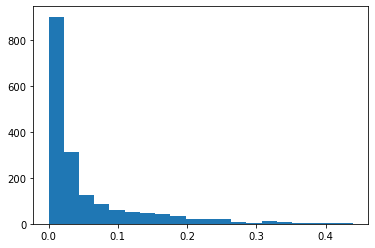

2560


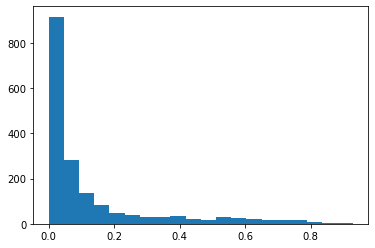

5120


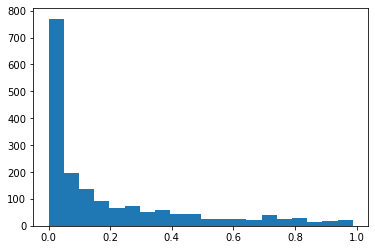

In [21]:
compare_depth_distribution(df_main_result_merged)
# more difference with larger train keep.
# which is understandable, because more training data leads to more distributed depth, and thus cosine distances will be more spread out.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
def compare_depth_diff(df_this):
    for train_keep in df_this.index.get_level_values('train_keep').unique():
        print(train_keep)
        df_this_size = df_this.xs(train_keep, level='train_keep')
        plt.close('all')
        fig, ax = plt.subplots(squeeze=True)
        aaa = df_this_size['source_analysis_vecnew'].map(lambda x: x[0])
        bbb = df_this_size['source_analysis_vecold'].map(lambda x: x[0])
        ax.scatter(aaa.values, bbb.values)
        ax.plot([0,1],[0,1],linestyle='--')
        plt.show()

1280


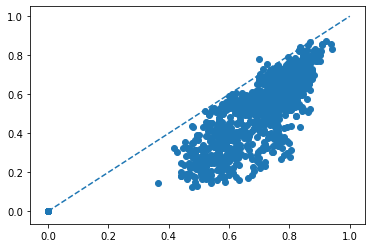

2560


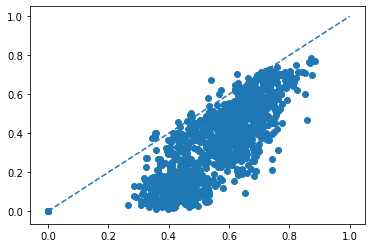

5120


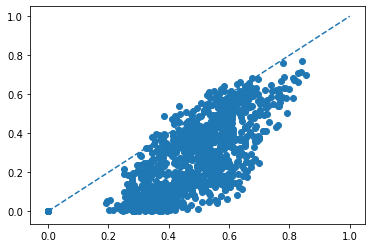

In [23]:
compare_depth_diff(df_main_result_merged)